# THE SPARKS FOUNDATION

## Task 2: Prediction using unsupervised Machine Learning

#### To predict the optimum number of clusters on the given dataset and represent it visually

## Intern: Ishaan Thareja

#### Dataset : https://bit.ly/3kXTdox

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Reading the data

data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.cluster import KMeans

In [5]:
x = data.iloc[:,1:5]

In [6]:
# Checking the WCSS to find the optimum number of clusters

wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.33285841694538]

Text(0.5, 1.0, 'The Elbow Method')

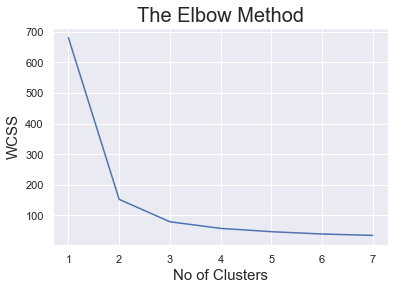

In [7]:
# Plotting the graph to see WCSS graphically

plt.plot(range(1,8), wcss)
plt.xlabel('No of Clusters', size=15)
plt.ylabel('WCSS', size=15)
plt.title('The Elbow Method', size=20)

#### According to the above graph, we select the number of clusters as 3

In [8]:
kmeans = KMeans(3, random_state = 1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [9]:
# Creating a summary table

cluster_table = data.iloc[:,1:6]
cluster_table['Cluster'] = kmeans.fit_predict(x)

In [10]:
cluster_table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


### Plotting the Sepal length and width graphs before and after clustering

Text(0.5, 1.0, 'After Clustering')

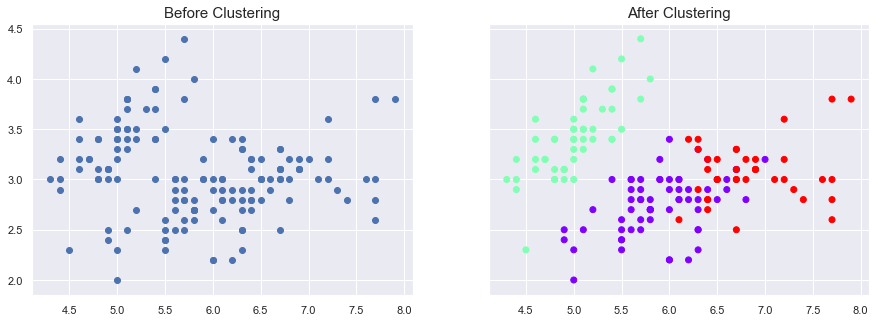

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))

ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
ax1.set_title('Before Clustering', size=15)

ax2.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax2.set_title('After Clustering', size=15)

### Plotting the Petal length and width graphs before and after clustering

Text(0.5, 1.0, 'After clustering')

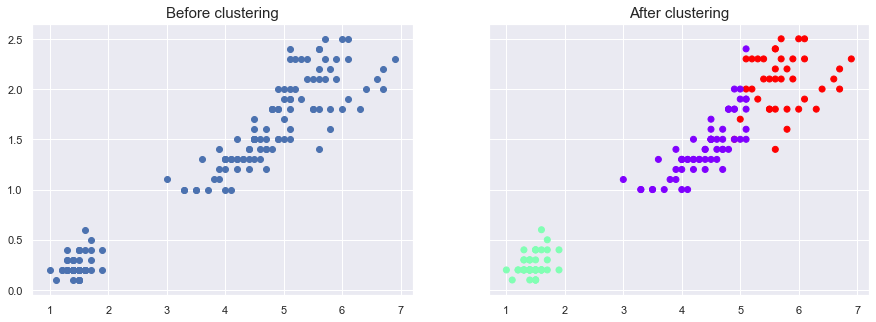

In [12]:
f, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(15,5))

ax3.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
ax3.set_title('Before clustering', size=15)

ax4.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax4.set_title('After clustering', size=15)

## Thank You!